# Team Bear: Qarik Coorporate Project
### Some exploratory data analysis and data visualization

The project consists on performing an analysis on the World Bank loan documentation, during the period 1990 - 2020. Since the data set is highly unstructured, extracting relevant features of each loan has been our main concern so far.

This notebook is concerned only with a single feature associated to each loan document: the countries involved in the loan.

In [1]:
#We first import some relevant packages

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


Our first data visualization will consist on a histogram showing in how many different loan documents a country is **mentioned**. And it does not show how many loan documents have been given to a country.

For example, we will see the US is mentioned in 3121 of 3205 loan documents, but this is mostly due to the fact that the World Bank has its HQ in the US.

We would also like to record that out of the 3205 documents, we not able to extract a single country mentioned on only 5 documents. However, there are known instances cases were the program does not extract the most 'relevant' country out of the documents. For example, Ivory Coast and Cote d'Ivoire are two names from the same country, but our program can only identify the first one.

In [2]:
#We import the relevant data
raw_country_count_df = pd.read_csv('freq_countries_mentioned.csv')
raw_country_count_df.rename(columns = {'Unnamed: 0': 'countries'}, inplace = True)
raw_country_count_df.head()

,countries,num_doc_mentioned
0,united states,3121
1,china,326
2,india,218
3,indonesia,213
4,brazil,154


In [3]:
raw_country_count_df.shape

(227, 2)

We will now plot a bar-like graph showing the frequency of the countries mentioned. But as we can see from the graph above, the US is mentioned an order of magnitud more than the second most mentioned country.

Hence, in order to make our graphs more meaninful we will exclude the US from the following visualizations.

[]

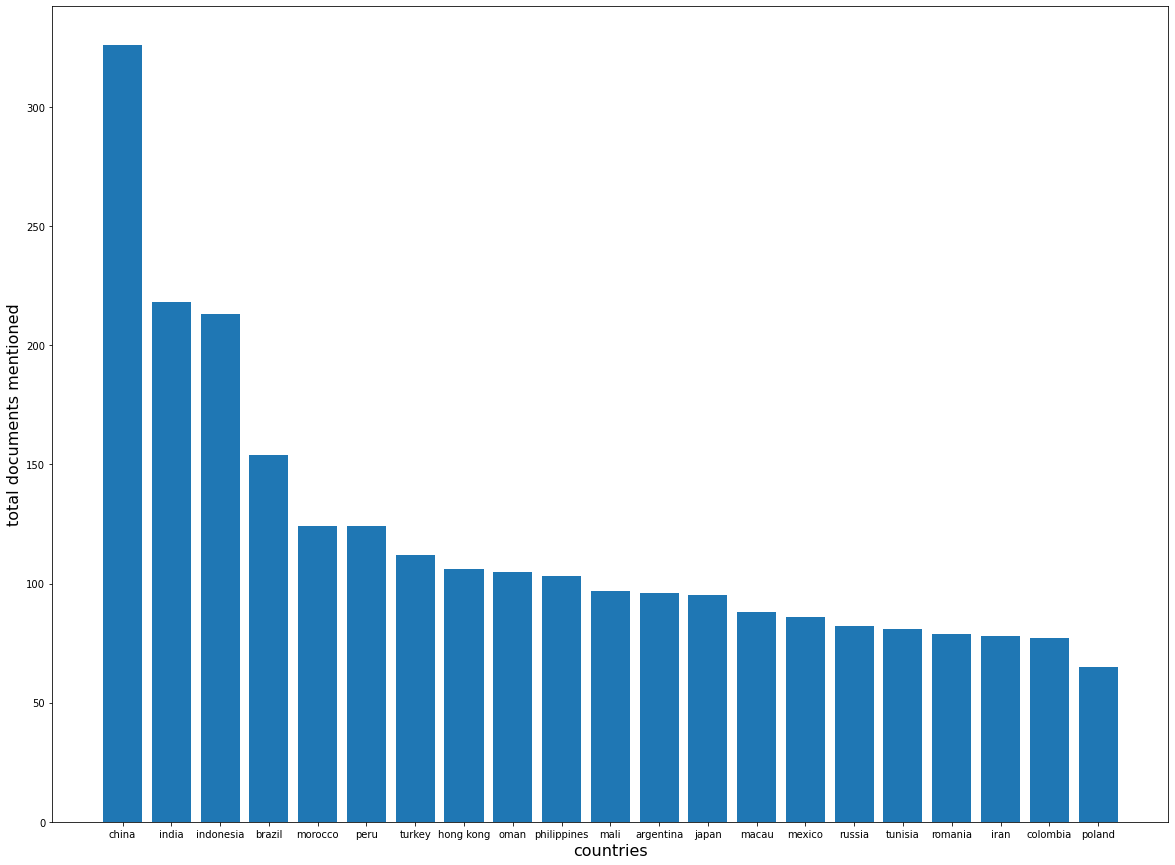

In [4]:
#We plot the 20 most mentioned countries, excluding the US.

plt.figure(figsize = (20,15))

plt.bar(raw_country_count_df.loc[1:21, 'countries'].values, 
        raw_country_count_df.loc[1:21, 'num_doc_mentioned'].values)

plt.xlabel('countries', fontsize = 16)
plt.ylabel('total documents mentioned', fontsize = 16)

plt.plot()

In [5]:
countries_not_mentioned_df = raw_country_count_df[raw_country_count_df.num_doc_mentioned == 0]

In [6]:
countries_not_mentioned_df.shape

(64, 2)

This shows that from the 227 countries considered, 64 (~ 30% of all countries) were never mentioned in any loan documents.

We will now perform a similar analysis as the one done above with a sligtly different data set. The data set still coinsists of country names and integers associated to them. However, this time the number associated to the country is the number of times this country was the one mentioned the most in the document (which is our best approximation to assigning a single country to each loan document).

In [7]:
max_country_count_df = pd.read_csv('max_countries_mentioned.csv')
max_country_count_df.rename(columns = {'Unnamed: 0': 'countries'}, inplace = True)
max_country_count_df.head()

,countries,num_doc_max
0,china,318
1,indonesia,205
2,india,197
3,united states,149
4,brazil,142


As we can see, the US appears as the most mentioned country in 149 documents. We should not regard this as saying that the US has taken 149 loans, but rather, that our method failed to extract the 'true country' associated to the loan in this occations.

We use the following two facts to justify this claim:
- The World Bank has its HQ in the US. Furthermore, we already saw that the US was mentioned at least once in the large mayority of the documents.
- According to [Wikipedia](https://en.wikipedia.org/wiki/World_Bank) the World Bank "is an international financial institution that provides loans and grants to the governments of low- and middle-income countries for the purpose of pursuing capital projects". And the US clearly does not fit this description.

[]

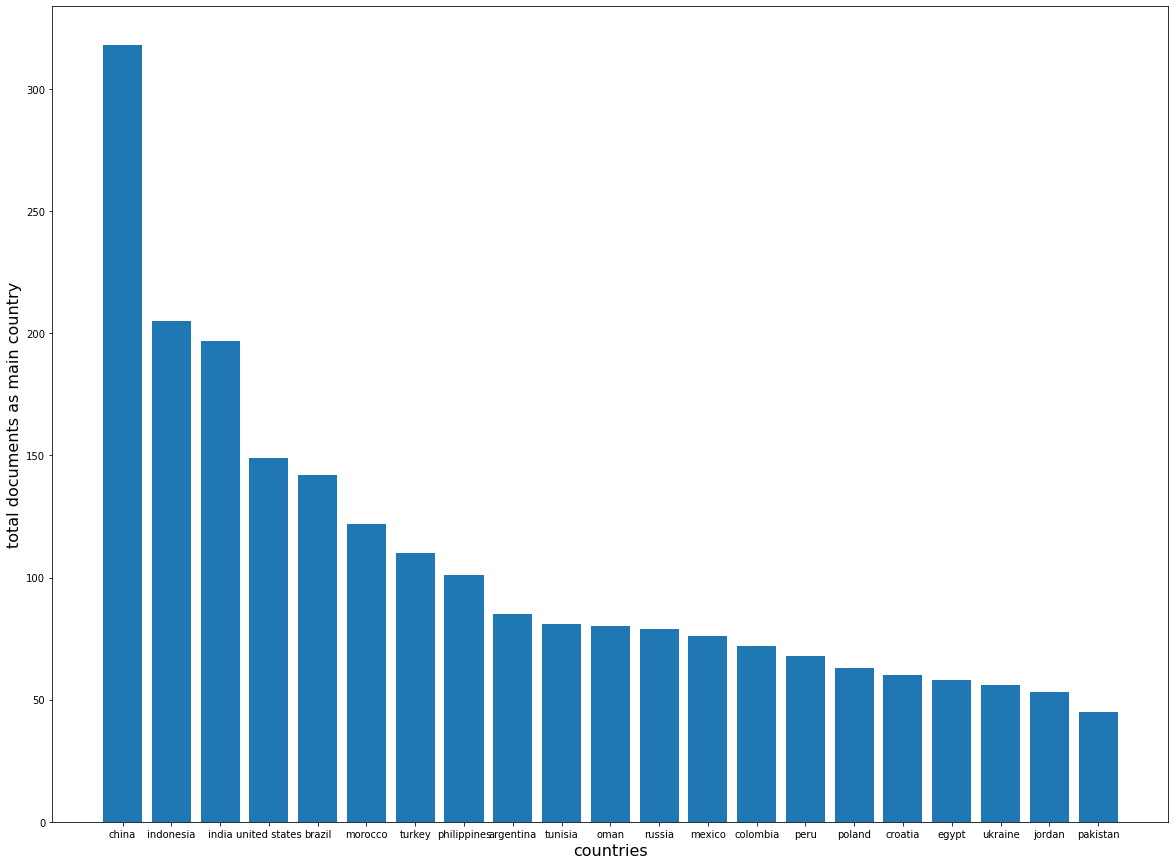

In [8]:
#We plot the 20 most mentioned countries, excluding the US.

plt.figure(figsize = (20,15))

plt.bar(max_country_count_df.loc[0:20, 'countries'].values, 
        max_country_count_df.loc[0:20, 'num_doc_max'].values)

plt.xlabel('countries', fontsize = 16)
plt.ylabel('total documents as main country', fontsize = 16)

plt.plot()

In [9]:
countries_not_max_df = max_country_count_df[max_country_count_df.num_doc_max == 0]
countries_not_max_df.shape

(119, 2)

Since there are some many countries, we would like to perform a couple of dimensionality reductions to better understand the loan distributions among countries. We will do this in the following two ways

- We will group the countries by region and get a bar diagram as the one above. However, this time there are only 11 regions in the world being considered -- considerably less than the 227 countries considered.
- We will split the countries by GDP as follows: the country with largest GDP (per capita) has a GDP of aproximately 55000, and so we will divide the interval (0, 60 000) into 20 bins, and get a histogram representing how often a country with a certain GDP took a loan.

In [115]:
#We import the relevant data. Unlike the work we did above were the data was ready to be consumed,
#There is still some work to be done to extract the data needed for the visualization.

df_pdf = pd.read_csv('PyMU_max_countries.csv')
df_tess = pd.read_csv('tess_max_countries.csv')
countries = pd.read_csv('countries.csv')

In [116]:
#In the countried DataFrame the column 'Country', we need to replace the country names by lowercase, and
#remove some blankspaces at the end for ease of use.

for index in countries.index:
    countries.at[index, 'Country'] = countries.loc[index, 'Country'].lower().strip()

In [117]:
#We run np.unique to count how often countries were mentioned. This is essentially the same as the data frames
#raw_country_count and max_country_count

pdf_regions_count = np.unique(df_pdf.world_region.values, return_counts = True)
tess_regions_count = np.unique(df_tess.world_region.values, return_counts = True)

#We also make a list of all the regions in the world, and normalize it with lowercase and removing some blankspaces
total_regions_list = [x.lower().strip() for x in np.unique(countries.Region.values)]

In [118]:
#Takes as input the np.arrays we did in the previous box, and returns a dictionary assigning to each region
#the amount of times it was mentioned

def get_region_dic(np_unique_count):
    dic = {x : 0 for x in total_regions_list}
    dic['None'] = 0
    for index in range(len(np_unique_count[0])):
        region = np_unique_count[0][index]
        num = np_unique_count[1][index]
        dic[region] = num
    return dic

In [119]:
#Get dictionary of different regions for PyMU and Tess loan documents

pdf_region_dic = get_region_dic(pdf_regions_count)
tess_region_dic = get_region_dic(tess_regions_count)


In [120]:
#Add both dictionaries to get a total amount of loans per region

total_region_dic = {x : 0 for x in total_regions_list}
total_region_dic['None'] = 0

for key in total_region_dic.keys():
    total_region_dic[key] = pdf_region_dic[key] + tess_region_dic[key]

In [121]:
total_region_df = pd.DataFrame.from_dict(total_region_dic, orient = 'index', columns = ['num_regions_max'])

In [122]:
total_region_df

,num_regions_max
asia (ex. near east),931
baltics,57
c.w. of ind. states,306
eastern europe,270
latin amer. & carib,723
near east,269
northern africa,303
northern america,149
oceania,6
sub-saharan africa,128


As we see in the bar diagram below. The regions with the most loans are Asia (China, India, Indonesia) and Latin America (Brazil, Argentina, Colombia, Peru).

It could be worthwile to focus on specific countries or regions and study the effect of the loans.

[]

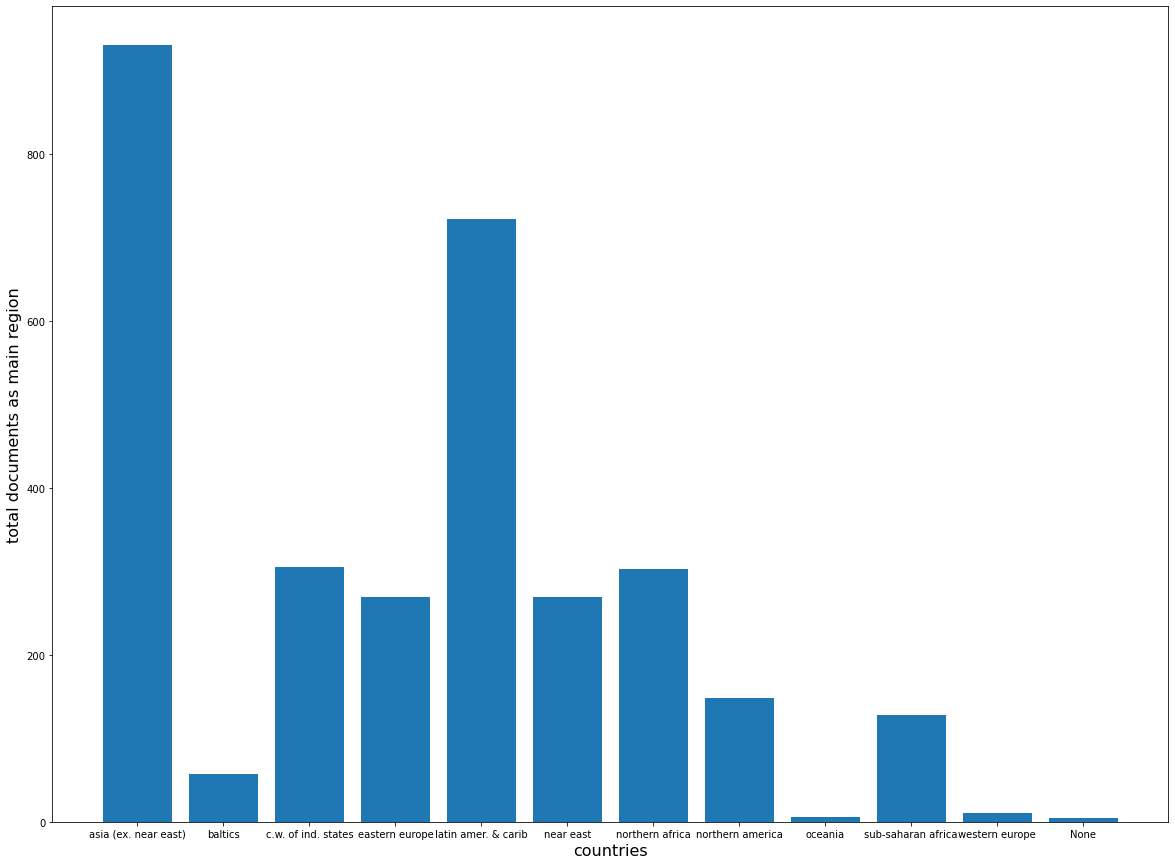

In [124]:
plt.figure(figsize = (20,15))

plt.bar(total_region_df.index.values, 
        total_region_df.num_regions_max.values)

plt.xlabel('countries', fontsize = 16)
plt.ylabel('total documents as main region', fontsize = 16)

plt.plot()

In [125]:
countries.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,american samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN


In [126]:
#Takes as input the data frames df_tess and df_pdf and returns a list with the GDP of the country taking the loan.
#This raw list should be enough to make a good histogram

def get_total_gdp_list(data):
    list = []
    for index in data.index:
        country_name = data.loc[index, 'max_country']
        if country_name == 'None':
            list.append(0)
        else:
            country_file = countries[countries.Country == country_name]
            gdp_list = country_file.loc[:,'GDP ($ per capita)'].values.tolist()
            if len(gdp_list) == 0:
                list.append(0)
            else:
                gdp = country_file.loc[:,'GDP ($ per capita)'].values.tolist()[0]
                list.append(gdp)
    return list

In [127]:
#Gets the lists for the two data frames and concatenates them to a single list

tess_gdp_list = get_total_gdp_list(df_tess)
pdf_gdp_list = get_total_gdp_list(df_pdf)
total_gdp_list = tess_gdp_list + pdf_gdp_list

We now proceed to show two histograms which are the most meaninful when considered together. Lets first describe what both histograms show

- The first histogram shows how many loans countries within a certain GDP range get.
- The second histogram shows how many countries within a certain GDP range are there.

These histograms show (when considered together), that even though there is a very high concentration of countries with low GDP (0, 3000), they do not recieve nearly as many loans are the countries in the range (3000-6000).

This shows that even though the world bank aims to help low-income countries, a certain amount of infrastructure (quantified in this case by wealth, i.e. GDP), is essential to consistently get loans from the World Bank.

Let us record the GDP of some relevant countries:
- China: 5000
- India: 2900
- Indonesia: 3200
- Brazil: 7600
- Argentina: 11200
- Mexico: 9000
- Peru: 5100
- Colombia: 6300

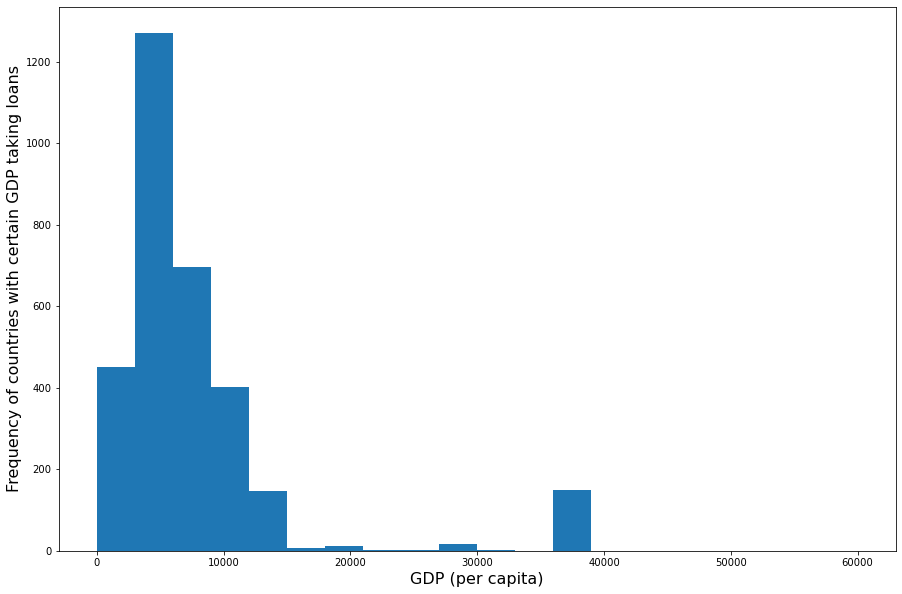

In [137]:
plt.figure(figsize = (15,10))

plt.hist(total_gdp_list, bins = 20, range =(0, 60000))
plt.xlabel('GDP (per capita)', fontsize = 16)
plt.ylabel('Frequency of countries with certain GDP taking loans', fontsize = 16)

plt.show()

In [138]:
countries_gdp_list = countries.loc[:, 'GDP ($ per capita)'].values.tolist()

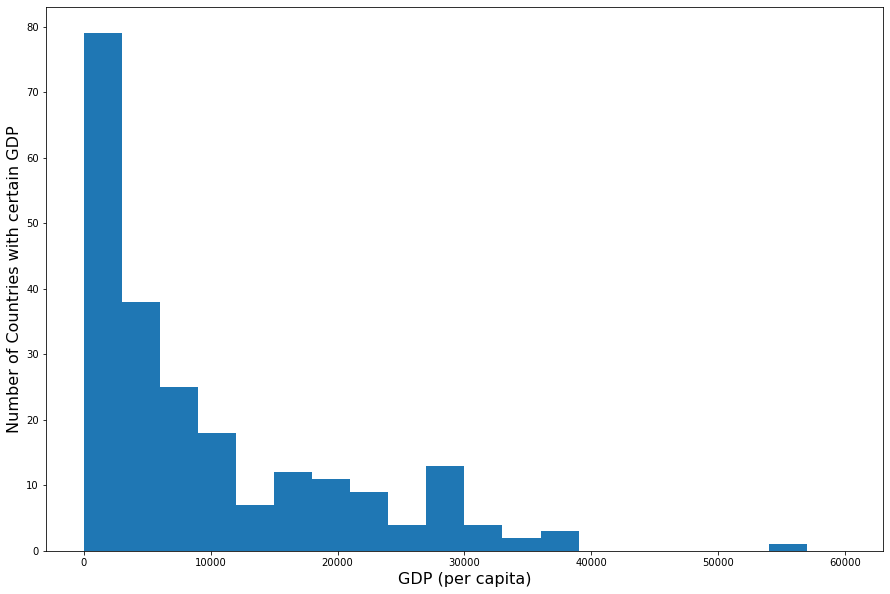

In [139]:
plt.figure(figsize = (15,10))

plt.hist(countries_gdp_list, bins = 20, range =(0, 60000))
plt.xlabel('GDP (per capita)', fontsize = 16)
plt.ylabel('Number of Countries with certain GDP', fontsize = 16)

plt.show()